
#Your images will be from the MSCOCO mini dataset and will be of class person. Download the dataset to your Gdrive.

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#import libraries

In [28]:
import tensorflow as tf
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

#Feature extraction Function

In [29]:
model=ResNet50(weights='imagenet',include_top=False,
               input_shape=(224,224,3))
def extract_features(img_path,model):
  input_shape= (224,224,3)
  img=image.load_img(img_path, target_size=(
      input_shape[0],input_shape[1]))
  img_array= image.img_to_array(img)
  expanded_img_array = np.expand_dims(img_array,axis=0)
  preprocessed_img = preprocess_input(expanded_img_array)
  features = model.predict(preprocessed_img)
  flattened_features = features.flatten()
  normalized_features = flattened_features / norm(flattened_features)
  return normalized_features

#Loading dataset

In [30]:
extensions = ['.jpg', '.JPG','.JPEG','.jpeg','.png','.PNG']
def get_file_list(root_dir):
  file_list = []
  counter = 1
  for root,directories, filenames in os.walk(root_dir):
    for filename in filenames:
      if any(ext in filename for ext in extensions):
        file_list.append(os.path.join(root,filename))
        counter +=1
  return file_list
       

In [34]:
root_dir = '/content/drive/MyDrive/mscocotrain2017'
test_dir = '/content/drive/MyDrive/mscocotrain2017/mscocoval2017'
filenames = sorted(get_file_list(root_dir))
test_file = sorted(get_file_list(test_dir))


#extracting feature


In [42]:
features_list = []
for i in tqdm_notebook(range(len(filenames))):
  features_list.append(extract_features(filenames[i], model))
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/208 [00:00<?, ?it/s]

1/1 [==============================] - 0s 198ms/step


In [43]:
test_feature = []
for j in tqdm_notebook(range(len(test_file))):
  test_feature.append(extract_features(test_file[j], model))
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/65 [00:00<?, ?it/s]

1/1 [==============================] - 0s 207ms/step


#similarity search

In [44]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

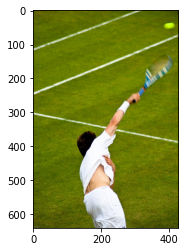

In [46]:
image_index=5
nei=NearestNeighbors(n_neighbors=10, algorithm='brute',
                     metric='euclidean').fit(features_list)
distances, indices = nei.kneighbors([test_feature[image_index]])
plt.imshow(mpimg.imread(test_file[image_index]))

similar matches
[148 118   1  41 154  19  13 186  38  47]


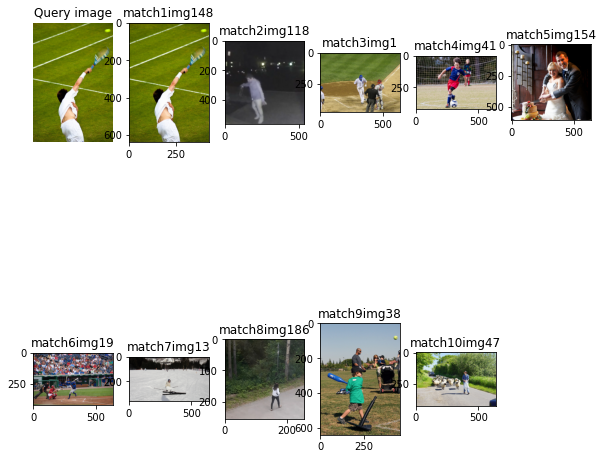

In [47]:
fig=plt.figure(figsize=(10,10))
r=2
c=6
fig.add_subplot(r,c,1)
plt.imshow(mpimg.imread(test_file[image_index]))
plt.axis('off')
plt.title('Query image')
print('similar matches')
indices=indices.flatten()
print(indices)

for i in range(len(indices)):
  fig.add_subplot(r,c,i+2)
  plt.imshow(mpimg.imread(filenames[indices[i]]))
  plt.title('match'+str(i+1)+'img'+str(indices[i]))

In [48]:
for i in range(10):
  print(indices[i],distances[0][i])

148 9.541399e-08
118 1.2400547
1 1.2403921
41 1.2434838
154 1.2437176
19 1.2528903
13 1.2559528
186 1.2573601
38 1.2613846
47 1.2629414
